In [ ]:
import sys

sys.path.append("..")

In [ ]:
from data.dataloader import LowLightDataModule
from model.blocks.enhancer import Decoder, Encoder
from utils.utils import show_batch

In [ ]:
data_module = LowLightDataModule(
    train_dir="../data/1_train",
    valid_dir="../data/2_valid",
    bench_dir="../data/3_bench",
    infer_dir="../data/4_infer",
    image_size=128,
    batch_size=1,
    num_workers=4,
)

data_module.setup(stage="fit")

In [ ]:
train_dataloader = data_module.train_dataloader()

In [ ]:
train_low, train_high = next(iter(train_dataloader))

In [ ]:
encoder = Encoder(
    channels=3,
    kernel_size=15,
    sigma=5,
    embed_dim=16,
    num_heads=1,
    mlp_ratio=1,
    dropout_ratio=0.2,
)

In [ ]:
train_low = train_low.cuda()
encoder = encoder.cuda()

In [ ]:
condition = encoder(train_low)

torch.Size([1, 3, 128, 128])


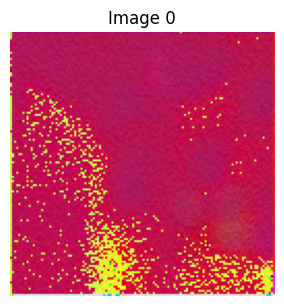

In [ ]:
print(condition.shape)
show_batch(images=condition)

In [ ]:
decoder = Decoder(
    channels=3,
    embed_dim=16,
    num_heads=1,
    mlp_ratio=1,
    num_resolution=1,
    dropout_ratio=0.2,
)

In [ ]:
decoder = decoder.cuda()

In [ ]:
output = decoder(train_low, condition)

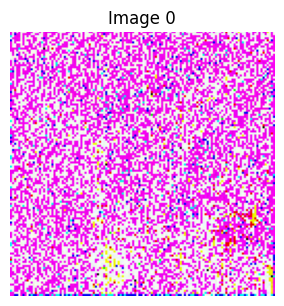

In [ ]:
show_batch(images=output)